In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
matches = pd.read_csv("data/euro_soccer/Matches.csv")
teams = pd.read_csv("data/euro_soccer/Team.csv")
teams_attr = pd.read_csv("data/euro_soccer/Team_Attributes.csv")
players = pd.read_csv("data/euro_soccer/Player.csv")
players_attr = pd.read_csv("data/euro_soccer/Player_Attributes.csv")
countries = pd.read_csv("data/euro_soccer/Country.csv")
leagues = pd.read_csv("data/euro_soccer/League.csv")

In [4]:
players_attr.query("player_api_id == 109147")

In [5]:
# matches.columns()
# [(i,x) for i, x in enumerate(matches.columns.tolist())]

# df.columns[[0, 4, 2]], axis = 1, inplace = True)
matches.drop(matches.columns[86:], axis=1, inplace=True)
# teams.queryplayers("team_api_id == 9987")

In [4]:
#vitorias
m = [matches.home_team_goal > matches.away_team_goal]
tamanho = len(sum(m))
winners = sum(sum(m))

#empates
n = [matches.home_team_goal == matches.away_team_goal]
empates = sum(sum(n))

#derrotas
p = [matches.home_team_goal < matches.away_team_goal]
losers = sum(sum(p))
# tam = len(matches.home_team_goal.tolist())
# l = [matches.home_team_goal > matches.away_team_goal]
# sum(l)/len(l)
# teams_attr.query("team_api_id == 9987")

In [5]:
print(winners/tamanho)
print(empates/tamanho)
print(losers/tamanho)
# sm = matches.iloc[0,:]
# st = teams.iloc[0,:]

0.45871665576042187
0.25389737865198814
0.28738596558759


In [6]:
df = matches.sample(5).T

In [7]:
[(i,x) for i, x in enumerate(df.T.columns.tolist())]

# df.T
df2X = df.T[df.T.columns[12:34]]
df2Y = df.T[df.T.columns[34:56]]

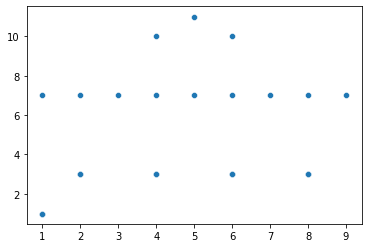

In [8]:
# df2X.iloc[0].tolist()
sns.scatterplot(x=df2X.iloc[1].tolist(), y=df2Y.iloc[1].tolist())

In [9]:
df.drop("Unnamed: 0", inplace=True)

In [10]:
# matches.head().T
# matches.head()
matches.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
df_home_9989 = matches.query("home_team_api_id == 9989")
df_away_9989 = matches.query("away_team_api_id == 9989")

In [12]:
# matches.query("away_team_api_id == 9989").count()

In [13]:
#9989 as Home
vitorias = [df_home_9989.home_team_goal > df_home_9989.away_team_goal]
empates = [df_home_9989.home_team_goal == df_home_9989.away_team_goal]
derrotas = [df_home_9989.home_team_goal < df_home_9989.away_team_goal]

tamanho = len(sum(vitorias))

vitorias = sum(sum(vitorias))
empates = sum(sum(empates))
derrotas = sum(sum(derrotas))


print("Vitorias: ", vitorias/tamanho)
print("Empates: ", empates/tamanho)
print("Derrotas: ", derrotas/tamanho)

Vitorias:  0.23809523809523808
Empates:  0.4603174603174603
Derrotas:  0.30158730158730157


In [14]:
#9989 as Away
derrotas = [df_away_9989.home_team_goal > df_away_9989.away_team_goal]
empates = [df_away_9989.home_team_goal == df_away_9989.away_team_goal]
vitorias = [df_away_9989.home_team_goal < df_away_9989.away_team_goal]

tamanho = len(sum(vitorias))

vitorias = sum(sum(vitorias))
empates = sum(sum(empates))
derrotas = sum(sum(derrotas))


print("Vitorias: ", vitorias/tamanho)
print("Empates: ", empates/tamanho)
print("Derrotas: ", derrotas/tamanho)

Vitorias:  0.1111111111111111
Empates:  0.2222222222222222
Derrotas:  0.6666666666666666


In [15]:
# df_away_9989.head(
df_away_9989["ganhou"] = df_away_9989.home_team_goal < df_away_9989.away_team_goal
df_home_9989["ganhou"] = df_home_9989.home_team_goal > df_home_9989.away_team_goal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
df_x = df_home_9989[df_home_9989.columns[10:54]].values.tolist()
# df_x = df_home_9989[df_home_9989.columns[10:54]]

In [17]:
df_y = df_home_9989["ganhou"].map({False:0, True:1}).tolist()
# df_y = df_home_9989["ganhou"].map({False:0, True:1})

In [18]:
# df_x["ganhou"]=df_y

In [19]:
# sns.lmplot(x="home_player_X2",y="home_player_X4", data=df_x, hue='ganhou', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [20]:
model = svm.SVC(kernel='linear')
model.fit(df_x, df_y)
# len(df_x)
# len(df_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
# w = model.coef_[0]
scaler = StandardScaler()
scaler.fit(df_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
# matches.sample(1).T

In [23]:
new_df_x = scaler.transform(df_x)

In [24]:
# model = svm.SVC(kernel='linear')
# model.fit(new_df_x, df_y)

In [25]:
# model.coef_[0]

In [26]:
from sklearn.metrics import classification_report

In [27]:
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [28]:
train_x = new_df_x[:48]
teste_x = new_df_x[48:]

In [29]:
train_y = df_y[:48]
teste_y = df_y[48:]

In [30]:
model = svm.SVC(kernel='linear')
model.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
predict_y = model.predict(teste_x)

In [32]:
predict_y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [33]:
a = classification_report(teste_y, predict_y)

In [34]:
print(a)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.50      0.33      0.40         3

    accuracy                           0.80        15
   macro avg       0.67      0.62      0.64        15
weighted avg       0.78      0.80      0.78        15



In [35]:
teste_y

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [36]:
predict_y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [47]:
matches.sample(1).T
#Possíveis features:
# formação (x,y), 

,7951
id,7952
country_id,7809
league_id,7809
season,2008/2009
stage,23
date,2009-03-07 00:00:00
match_api_id,499523
home_team_api_id,8226
away_team_api_id,8697
home_team_goal,0


In [46]:
# df_home_lose.count()